In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hackathon.csv')

In [3]:
df

,Set,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,No,No
1,0,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,No,No
2,0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,No,No
3,0,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,No,No
4,0,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,Yes,No
12326,0,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,Yes,No
12327,0,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,Yes,No
12328,0,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,No,No


# Checking missing values

In [4]:
df.isnull().mean()

Set                        0.0
Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

# Exploring categorical variables

In [5]:
categorical_columns = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']

In [6]:
for column in categorical_columns:
    crosstab = pd.crosstab(df['Revenue'], df[column])
    display(crosstab / np.array(crosstab).sum(axis=0).reshape(-1))

Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
Revenue,,,,,,,,,,
No,0.82448,0.874928,0.983696,0.847222,0.899306,0.899318,0.891498,0.746498,0.790528,0.808036
Yes,0.17552,0.125072,0.016304,0.152778,0.100694,0.100682,0.108502,0.253502,0.209472,0.191964


OperatingSystems,1,2,3,4,5,6,7,8
Revenue,,,,,,,,
No,0.853385,0.825027,0.895108,0.822176,0.833333,0.894737,0.857143,0.78481
Yes,0.146615,0.174973,0.104892,0.177824,0.166667,0.105263,0.142857,0.21519


Browser,1,2,3,4,5,6,7,8,9,10,11,12,13
Revenue,,,,,,,,,,,,,
No,0.851747,0.846376,0.952381,0.82337,0.815846,0.885057,0.877551,0.844444,1.0,0.803681,0.833333,0.7,0.737705
Yes,0.148253,0.153624,0.047619,0.17663,0.184154,0.114943,0.122449,0.155556,0.0,0.196319,0.166667,0.3,0.262295


Region,1,2,3,4,5,6,7,8,9
Revenue,,,,,,,,,
No,0.838703,0.834507,0.854765,0.851946,0.836478,0.86087,0.843627,0.870968,0.831703
Yes,0.161297,0.165493,0.145235,0.148054,0.163522,0.13913,0.156373,0.129032,0.168297


TrafficType,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Revenue,,,,,,,,,,,,,,,,,,,,
No,0.893105,0.783542,0.912281,0.84565,0.784615,0.880631,0.7,0.723032,0.904762,0.8,0.809717,1.0,0.941734,0.846154,1.0,0.666667,1.0,1.0,0.941176,0.747475
Yes,0.106895,0.216458,0.087719,0.15435,0.215385,0.119369,0.3,0.276968,0.095238,0.2,0.190283,0.0,0.058266,0.153846,0.0,0.333333,0.0,0.0,0.058824,0.252525


VisitorType,New_Visitor,Other,Returning_Visitor
Revenue,,,
No,0.750885,0.811765,0.860677
Yes,0.249115,0.188235,0.139323


Weekend,No,Yes
Revenue,,
No,0.851089,0.826011
Yes,0.148911,0.173989


<font color='red'><b>Question:</b></font> In which month, is "Revenue" most likely abd least likely to be positive, respectively?

<font color='red'><b>Question:</b></font> For which visitor type, is "Revenue" most likely abd least likely to be positive, respectively?

# Exploring numeric variables

In [7]:
numeric_columns = ['Administrative', 'Administrative_Duration',
                   'Informational', 'Informational_Duration',
                   'ProductRelated', 'ProductRelated_Duration',
                   'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

<font color='red'><b>Question:</b></font> Is there any variable that shows good linear separability to differentiate "Revenue"? If so, which?

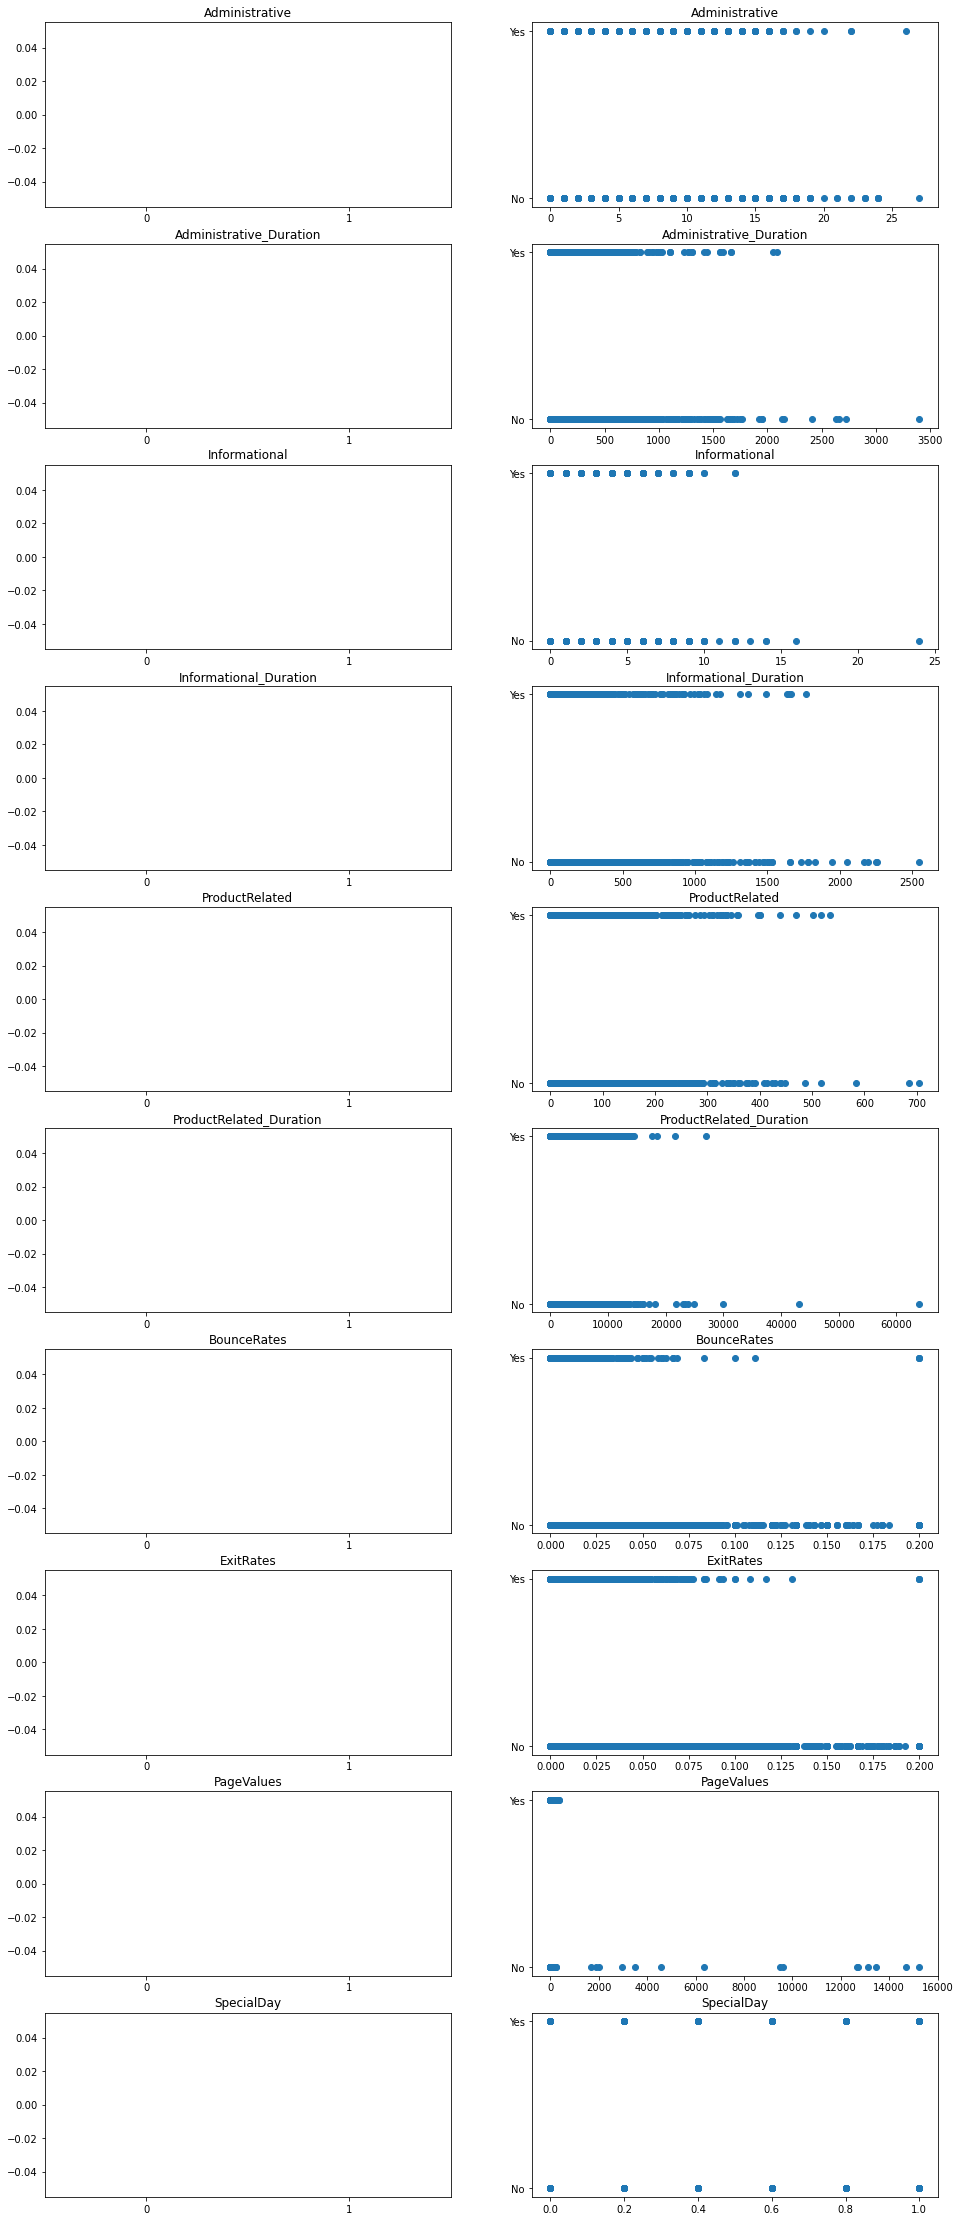

In [8]:
# We can make a conditional box plot for each variable against the label

fig, axs = plt.subplots(len(numeric_columns), 2, figsize=(16, 4*len(numeric_columns)))

for i in range(len(numeric_columns)):
    column = numeric_columns[i]
    labels = [0, 1]
    y = [df[column][df['Revenue'] == label] for label in labels]

    axs[i][0].boxplot(y, labels=labels)
    axs[i][0].set_title(column)
    
    axs[i][1].scatter(df[column], df['Revenue'])
    axs[i][1].set_title(column)

plt.show()

In [9]:
# We can make a conditional box plot for each variable against the label

for i in range(len(numeric_columns)):
    column = numeric_columns[i]
    display(df[[column, 'Revenue']].groupby(['Revenue']).describe())

Administrative                                              
                 count      mean       std  min  25%  50%  75%   max
Revenue                                                             
No             10422.0  2.117732  3.202481  0.0  0.0  0.0  3.0  27.0
Yes             1908.0  3.393606  3.730527  0.0  0.0  2.0  5.0  26.0

Administrative_Duration                                               \
                          count        mean         std  min  25%        50%   
Revenue                                                                        
No                      10422.0   73.740111  171.017970  0.0  0.0   0.000000   
Yes                      1908.0  119.483244  201.114732  0.0  0.0  52.366667   

                              
                75%      max  
Revenue                       
No        83.000000  3398.75  
Yes      151.083333  2086.75

Informational                                              
                count      mean       std  min  25%  50%  75%   max
Revenue                                                            
No            10422.0  0.451833  1.211582  0.0  0.0  0.0  0.0  24.0
Yes            1908.0  0.786164  1.521176  0.0  0.0  0.0  1.0  12.0

Informational_Duration                                              \
                         count       mean         std  min  25%  50%   75%   
Revenue                                                                      
No                     10422.0  30.236237  133.909306  0.0  0.0  0.0   0.0   
Yes                     1908.0  57.611427  171.619131  0.0  0.0  0.0  19.0   

                      
                 max  
Revenue               
No       2549.375000  
Yes      1767.666667

ProductRelated                                                    
                 count       mean        std  min   25%   50%   75%    max
Revenue                                                                   
No             10422.0  28.714642  40.744717  0.0   6.0  16.0  35.0  705.0
Yes             1908.0  48.210168  58.267365  0.0  15.0  29.0  57.0  534.0

ProductRelated_Duration                                            \
                          count         mean          std  min        25%   
Revenue                                                                     
No                      10422.0  1069.987809  1803.797757  0.0  151.00000   
Yes                      1908.0  1876.209615  2312.214392  0.0  541.90625   

                                               
                50%          75%          max  
Revenue                                        
No        510.19000  1331.816667  63973.52223  
Yes      1109.90625  2266.011310  27009.85943

BounceRates                                                       
              count      mean       std  min  25%       50%       75%  max
Revenue                                                                   
No          10422.0  0.025317  0.051877  0.0  0.0  0.004255  0.020000  0.2
Yes          1908.0  0.005117  0.012185  0.0  0.0  0.000000  0.006452  0.2

ExitRates                                                            
            count      mean       std  min       25%       50%       75%  max
Revenue                                                                      
No        10422.0  0.047378  0.051231  0.0  0.015560  0.028571  0.053846  0.2
Yes        1908.0  0.019555  0.016463  0.0  0.009521  0.016000  0.025000  0.2

PageValues                                                   \
             count       mean         std  min       25%        50%   
Revenue                                                               
No         10422.0  13.871699  366.270049  0.0  0.000000   0.000000   
Yes         1908.0  27.264518   35.191954  0.0  3.641144  16.758134   

                                  
               75%           max  
Revenue                           
No        0.000000  15239.000000  
Yes      38.897742    361.763742

SpecialDay                                             
             count      mean       std  min  25%  50%  75%  max
Revenue                                                        
No         10422.0  0.068432  0.209054  0.0  0.0  0.0  0.0  1.0
Yes         1908.0  0.023166  0.123521  0.0  0.0  0.0  0.0  1.0

# Set minority categories to "Others"

In [10]:
columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType']

for column in columns:
    count_df = df[[column, 'Revenue']].groupby(column).count().reset_index()
    rare_classes = count_df[count_df['Revenue'] < 100][column]
    
    for rare_class in rare_classes:
        df[column] = df[column].replace(rare_class, 0)

In [11]:
for column in categorical_columns:
    display(df[[column, 'Revenue']].groupby(column).agg(['count', 'mean']))

ValueError: no results

# One-hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
raw_column_names = categorical_columns
raw_columns = df[raw_column_names]

In [ ]:
enc = OneHotEncoder(drop='first')
enc.fit(raw_columns)
encoded_columns = enc.transform(raw_columns).toarray()
encoded_column_names = enc.get_feature_names_out()

In [ ]:
df[encoded_column_names] = encoded_columns

# Prepare features and label
Use the first 10000 rows as the training set and the remaining rows as the test set

In [ ]:
train_df = df[df['Set'] == 0]
test_df = df[df['Set'] == 1]

In [ ]:
label = 'Revenue'
excluded_features = [label, 'Set'] + raw_column_names
features = [feature for feature in df.columns if feature not in excluded_features]

In [ ]:
train_x = train_df[features]
train_y = train_df[label]

test_x = test_df[features]
test_y = test_df[label]

In [ ]:
train_x

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

In [ ]:
# Build model
model = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_split=100)

# Fit model on training data
model.fit(train_x, train_y)

# Visualize the decision tree
feature_names = train_x.columns.tolist()
plt.figure(figsize=(8, 5))
plot_tree(model, filled=True, feature_names=feature_names)
plt.show()

In [ ]:
from sklearn.tree import export_text

In [ ]:
print(export_text(model, feature_names=feature_names, show_weights=True))

In [ ]:
train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

In [ ]:
metrics.f1_score(train_y, train_yhat)

In [ ]:
metrics.f1_score(test_y, test_yhat)

In [ ]:
dt_f1_df = []

for i in range(1, 16):
    model = DecisionTreeClassifier(criterion='gini', max_depth=i, min_samples_split=200)
    model.fit(train_x, train_y)
    
    train_yhat = model.predict(train_x)
    test_yhat = model.predict(test_x)

    train_f1 = metrics.f1_score(train_y, train_yhat)
    test_f1 = metrics.f1_score(test_y, test_yhat)
    
    dt_f1_df.append([i, train_f1, test_f1])

dt_f1_df = pd.DataFrame(dt_f1_df, columns=['max_depth', 'train_f1', 'test_f1'])
dt_f1_df

In [ ]:
plt.plot(dt_f1_df['max_depth'], dt_f1_df['train_f1'])
plt.plot(dt_f1_df['max_depth'], dt_f1_df['test_f1'])

# k-nearest algorithm

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 5

model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_x.values, train_y)

train_yhat = model.predict(train_x.values)
test_yhat = model.predict(test_x.values)

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

print('kNN without normalization:', train_f1, test_f1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

normalizer = MinMaxScaler()

normalizer.fit(train_x)

train_x_norm = normalizer.transform(train_x)
test_x_norm = normalizer.transform(test_x)

In [ ]:
model = KNeighborsClassifier(n_neighbors=k)
model.fit(train_x_norm, train_y)

train_yhat_norm = model.predict(train_x_norm)
test_yhat_norm = model.predict(test_x_norm)

train_f1 = metrics.f1_score(train_y, train_yhat_norm)
test_f1 = metrics.f1_score(test_y, test_yhat_norm)

print('kNN with normalization:', train_f1, test_f1)

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import CategoricalNB, GaussianNB, MultinomialNB

In [ ]:
model = CategoricalNB()

model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

print('CategoricalNB:', train_f1, test_f1)

In [ ]:
model = GaussianNB()

model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

print('GaussianNB:', train_f1, test_f1)

In [ ]:
model = MultinomialNB()

model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

print('MultinomialNB:', train_f1, test_f1)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(train_x[numeric_columns], train_y)

train_yhat = model.predict(train_x[numeric_columns])
test_yhat = model.predict(test_x[numeric_columns])

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

print('Logistic Regression:', train_f1, test_f1)

# Best Model

In [ ]:
model = DecisionTreeClassifier(criterion='gini', max_depth=1, min_samples_split=200)
model.fit(train_x, train_y)

train_yhat = model.predict(train_x)
test_yhat = model.predict(test_x)

train_f1 = metrics.f1_score(train_y, train_yhat)
test_f1 = metrics.f1_score(test_y, test_yhat)

train_f1, test_f1